In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import corona_lib

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.style.use('seaborn-colorblind')

In [4]:
#- importing data
total_csv = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
deaths_csv = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
recovered_csv = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"

In [5]:
total = pd.read_csv(total_csv)
deaths = pd.read_csv(deaths_csv)
recovered = pd.read_csv(recovered_csv)

In [6]:
total = total.T
deaths = deaths.T
recovered = recovered.T

In [7]:
total = corona_lib.convert_dates_to_python(total)
deaths = corona_lib.convert_dates_to_python(deaths)
recovered = corona_lib.convert_dates_to_python(recovered)

In [8]:
total = corona_lib.initial_preprocess(total)
deaths = corona_lib.initial_preprocess(deaths)
recovered = corona_lib.initial_preprocess(recovered)

In [9]:
active = total - (deaths + recovered)

In [10]:
active["Poland"]

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-04-22    8230
2020-04-23    8317
2020-04-24    8454
2020-04-25    8623
2020-04-26    8817
Name: Poland, Length: 96, dtype: object

In [11]:
countries_selected = ["Poland", "Italy", "Germany", "Spain", "Sweden", "US"]

In [12]:
countries_selected_no_us = ["Poland", "Italy", "Germany", "Spain", "Sweden"]

In [13]:
total_selected = total[countries_selected]
deaths_selected = deaths[countries_selected]
recovered_selected = recovered[countries_selected]
active_selected = active[countries_selected]

In [14]:
# total_countries

In [15]:
# total_whole = corona_lib.df_initial_clean_up_whole(total)

In [16]:
# total[:4]

In [17]:
poland_1 = len(corona_lib.ret_starting_from(total_selected["Poland"], 1))

In [18]:
poland_10 = len(corona_lib.ret_starting_from(total_selected["Poland"], 10))

In [19]:
poland_100 = len(corona_lib.ret_starting_from(total_selected["Poland"], 100))

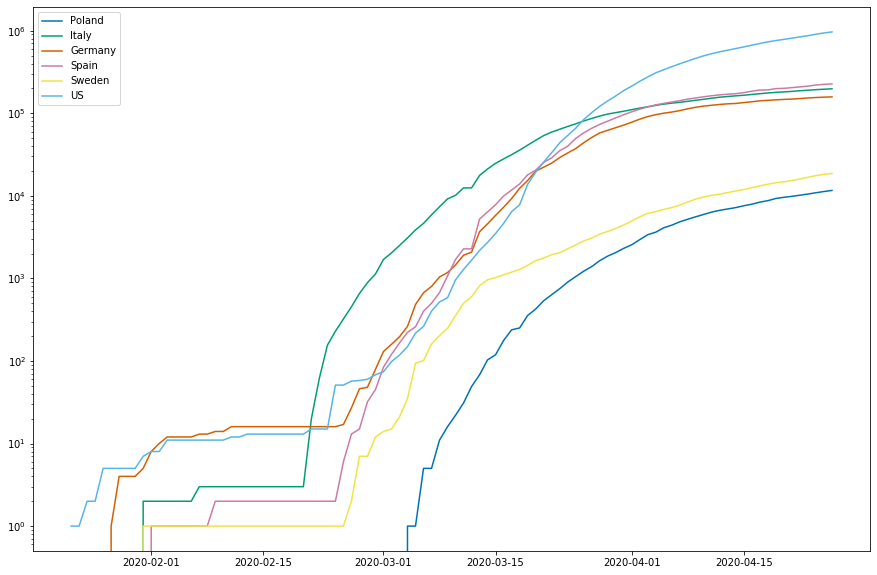

In [20]:
total_selected.plot(logy=True)

In [21]:
total_from_100 = corona_lib.return_from_infections(total_selected, 100)

In [22]:
total_from_100[:5]

,Poland,Italy,Germany,Spain,Sweden,US
0,103,155,130,120,101,118
1,119,229,159,165,161,149
2,177,322,196,222,203,217
3,238,453,262,259,248,262
4,251,655,482,400,355,402


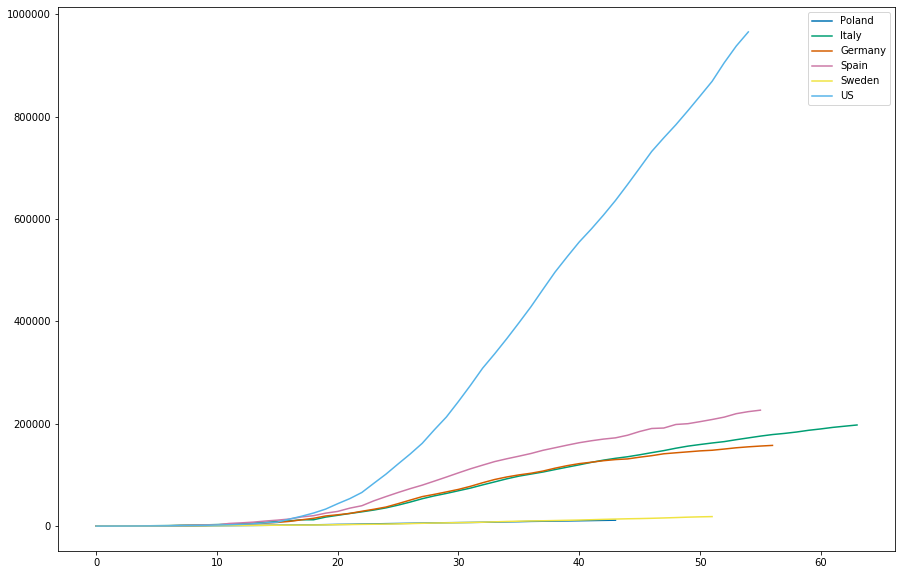

In [23]:
total_from_100.plot()

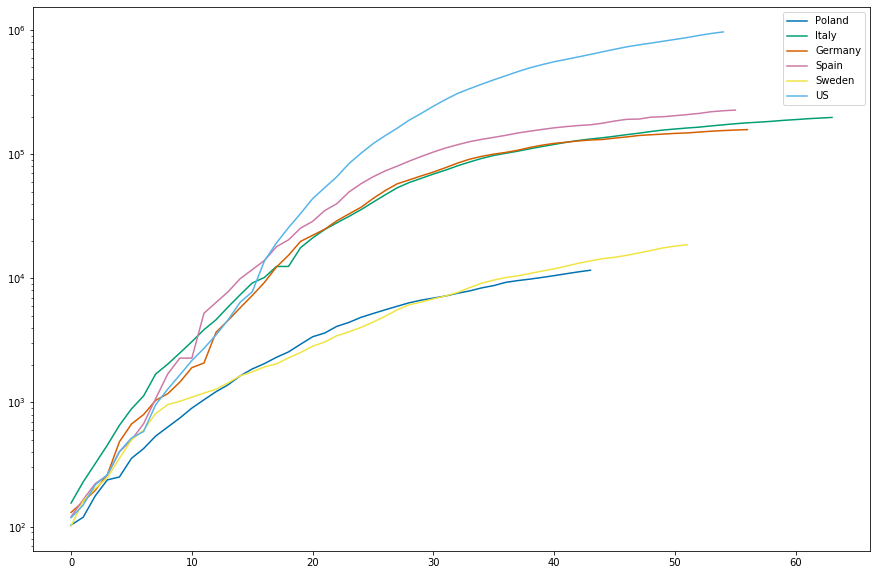

In [24]:
total_from_100.plot(logy=True)

In [25]:
len(total_selected.loc[total_selected.index[-poland_1:], "Poland"].diff())

54

<BarContainer object of 54 artists>

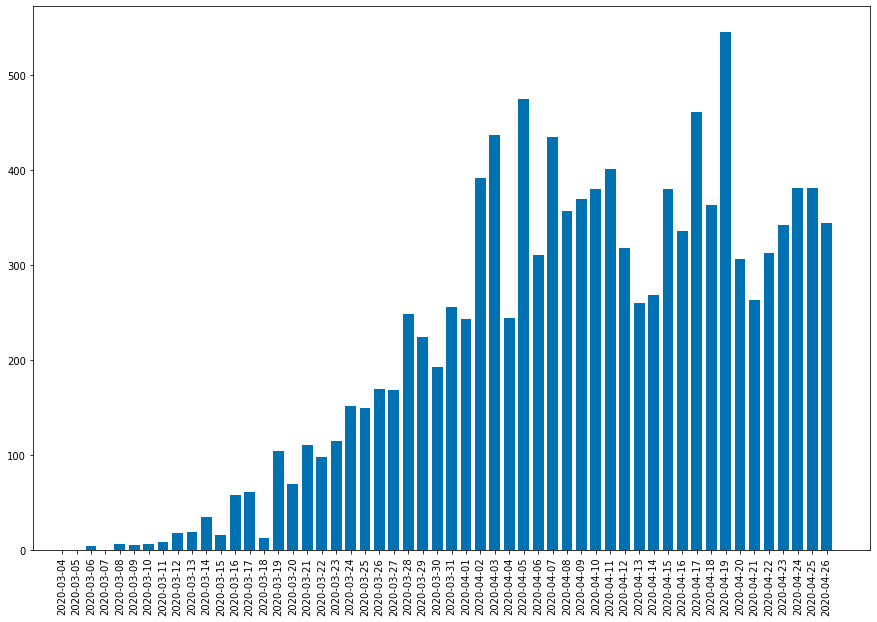

In [26]:
# bar plot for new daily cases diagnosed in Poland

xvals = range(len(total_selected.loc[total_selected.index[-poland_1:], "Poland"]))

labels = total_selected.index[-poland_1:]

# xvals = np.arange(len(labels))

ax = plt.gca()
# ax.set_xticks(x)
# ax.set_xticklabels(labels)


plt.xticks(xvals, (labels))

x = ax.xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

plt.bar(xvals, total_selected.loc[total_selected.index[-poland_1:], "Poland"].diff(), width=0.75)

In [27]:
# new cases in these countries data

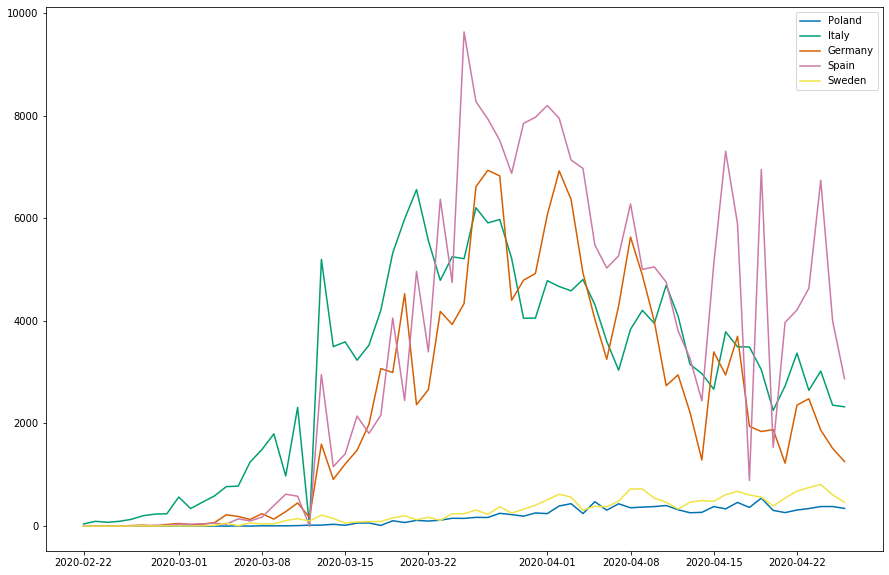

In [28]:
total_selected.iloc[30:, total_selected.columns.get_indexer(countries_selected_no_us)].diff().plot()

In [29]:
# przyrost procentowy każdego dnia
# for (columnName, columnData) in empDfObj.iteritems():

In [30]:
total_inc = corona_lib.increase_df(total_selected)

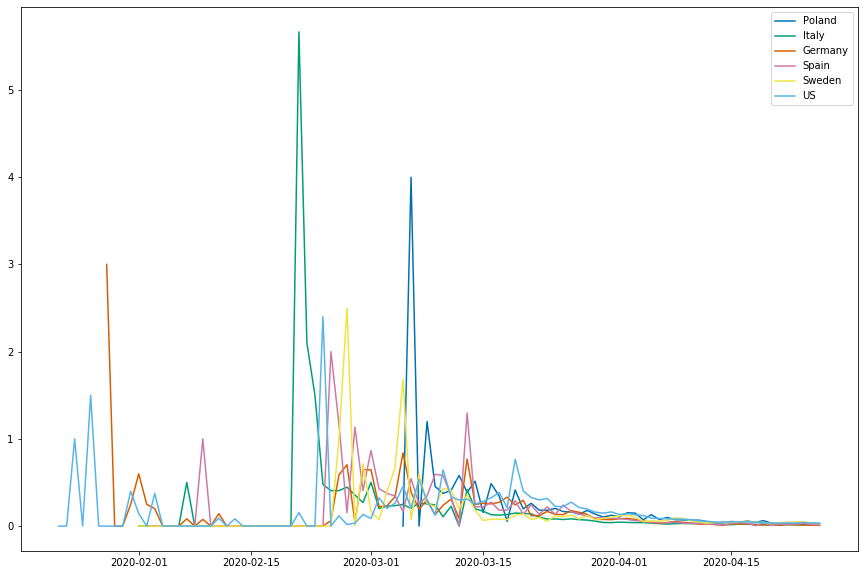

In [31]:
total_inc.plot();

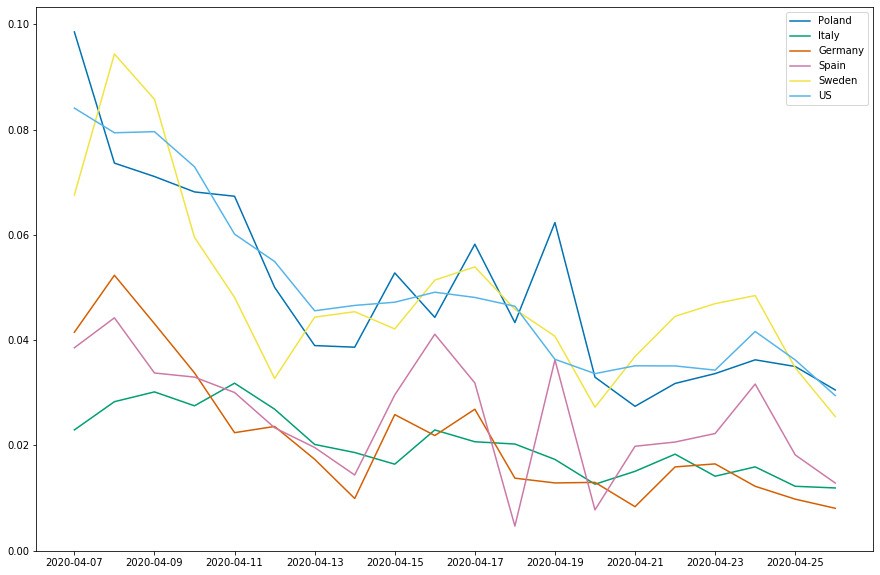

In [32]:
total_inc.iloc[-20:].plot()

In [33]:
total_to_double = corona_lib.increase_df(total_selected, double=True)

In [34]:
# total_to_double

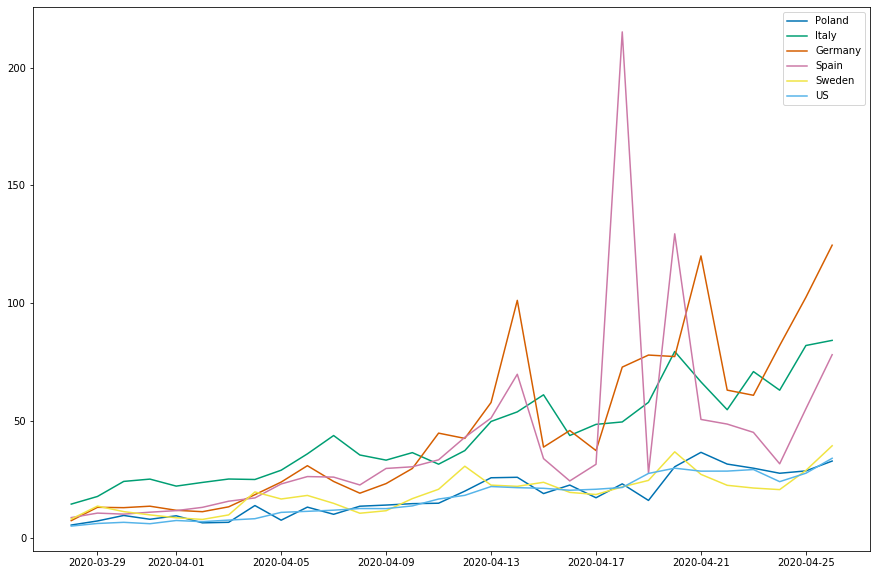

In [35]:
total_to_double[-30:].plot()

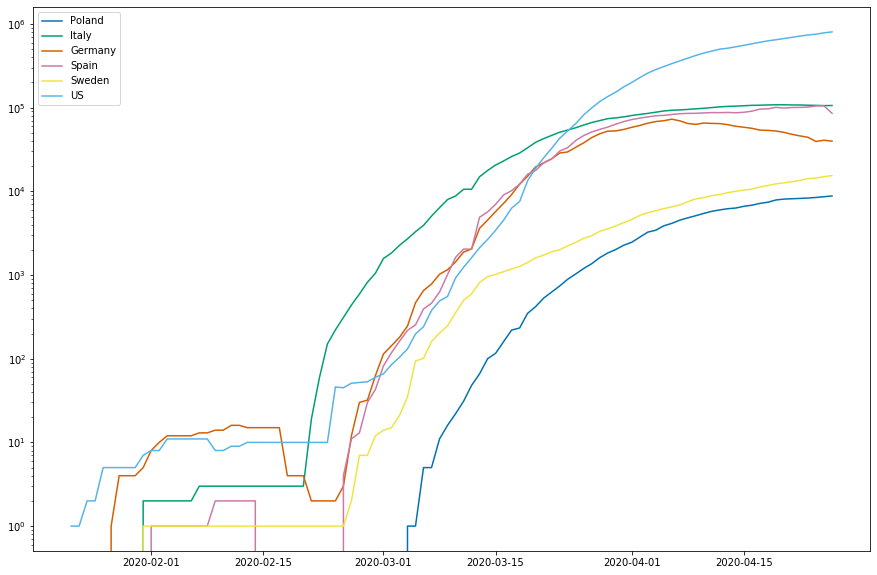

In [37]:
active_selected.plot(logy=True);

In [38]:
active_selected

,Poland,Italy,Germany,Spain,Sweden,US
2020-01-22,0,0,0,0,0,1
2020-01-23,0,0,0,0,0,1
2020-01-24,0,0,0,0,0,2
2020-01-25,0,0,0,0,0,2
2020-01-26,0,0,0,0,0,5
...,...,...,...,...,...,...
2020-04-22,8230,107699,45969,100757,13517,716363
2020-04-23,8317,106848,44254,101617,14184,739013
2020-04-24,8454,106527,39439,104885,14410,754330
2020-04-25,8623,105847,40836,105149,14980,784027
